In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [17]:
df = pd.read_csv("btc.csv")
df = df['Close'].reset_index(drop=True)

In [18]:
prediction_days = 60

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

In [39]:
training_set = df_train.values.reshape(-1, 1)
training_set = min_max_scaler.fit_transform(training_set)

SHIFT=5
x_train = training_set[0:len(training_set)-5]
y_train = training_set[5:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [40]:
x_train.shape

(4910, 1, 1)

## Modelling

In [41]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 30

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)


Epoch 1/30
982/982 [==============================] - 4s 3ms/step - loss: 0.0405
Epoch 2/30
982/982 [==============================] - 2s 2ms/step - loss: 0.0196
Epoch 3/30
982/982 [==============================] - 2s 2ms/step - loss: 0.0030
Epoch 4/30
982/982 [==============================] - 2s 2ms/step - loss: 5.7586e-04
Epoch 5/30
982/982 [==============================] - 2s 2ms/step - loss: 5.3469e-04
Epoch 6/30
982/982 [==============================] - 2s 2ms/step - loss: 5.2405e-04
Epoch 7/30
982/982 [==============================] - 2s 2ms/step - loss: 5.0887e-04
Epoch 8/30
982/982 [==============================] - 2s 2ms/step - loss: 4.9973e-04
Epoch 9/30
982/982 [==============================] - 2s 2ms/step - loss: 4.9142e-04
Epoch 10/30
982/982 [==============================] - 2s 2ms/step - loss: 4.8473e-04
Epoch 11/30
982/982 [==============================] - 2s 2ms/step - loss: 4.8233e-04
Epoch 12/30
982/982 [==============================] - 2s 2ms/step - loss: 

In [42]:
test_set = df_test.values.reshape(-1, 1)

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

2/2 [==============================] - 0s 5ms/step


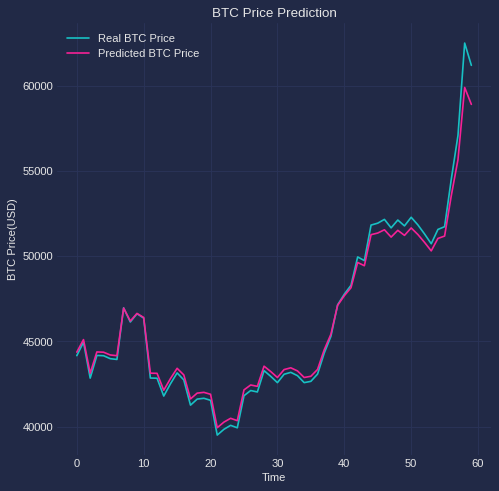

In [43]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

plt.figure(figsize=(7, 7), dpi=80)

plt.plot(test_set[:, 0],label='Real BTC Price')
plt.plot(predicted_price[:, 0],label = 'Predicted BTC Price')

plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price(USD)')
plt.legend(loc = 'best')
plt.show()

In [44]:
regressor.save('btc_lstm_5d.keras')

## Magic?

In [ ]:
rt_set =

inputs = np.reshape(rt_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)